In [22]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import pytesseract
# from pytesseract import Output

from ultralyticsplus import YOLO, render_result
from PIL import Image
import deepdoctection as dd
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
# from paddleocr import PaddleOCR, draw_ocr 
from matplotlib import pyplot as plt 
import cv2 
from pathlib import Path
import os
from IPython.core.display import HTML
from bs4 import BeautifulSoup


In [3]:
os.environ["PATH"] = rf"C:\Users\kortb\Downloads\Release-24.02.0-0\poppler-24.02.0\Library\bin"


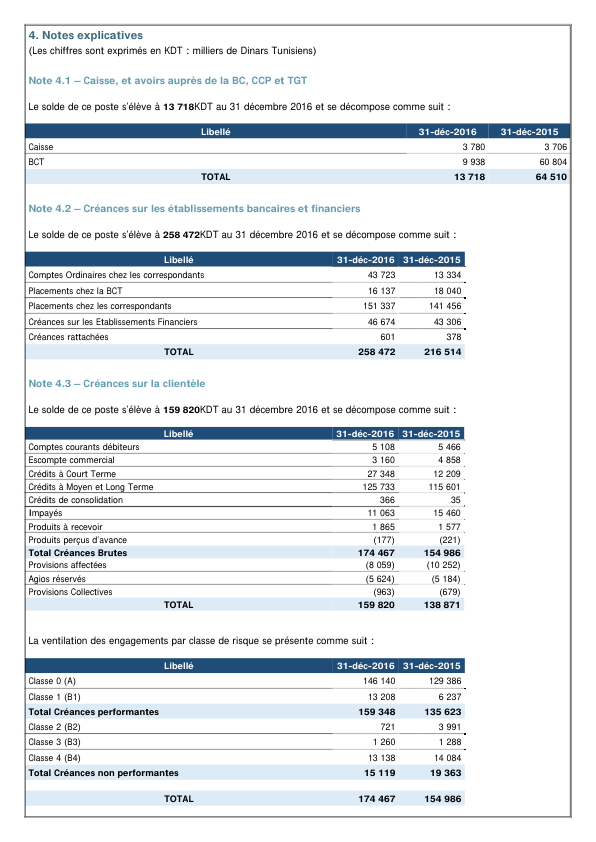

In [4]:
# image = 'ABC_EFD3112_2005_page_1.png'

image = 'abc_efd311216_page_7.png'

img = Image.open(image)
img

In [2]:
image_path = "1"

In [3]:
config_overwrite = ["LANGUAGE='fra'"]

analyzer = dd.get_dd_analyzer(config_overwrite)


[0421 23:29.32 @dd.py:453]  INF  Config: 
 {'DEVICE': 'cpu',
 'LANGUAGE': None,
 'LAYOUT_NMS_PAIRS': {'COMBINATIONS': None, 'PRIORITY': None, 'THRESHOLDS': None},
 'LIB': 'PT',
 'OCR': {'CONFIG': {'TESSERACT': 'dd/conf_tesseract.yaml'},
         'USE_DOCTR': True,
         'USE_TESSERACT': False,
         'USE_TEXTRACT': False,
         'WEIGHTS': {'DOCTR_RECOGNITION': {'PT': 'doctr/crnn_vgg16_bn/pt/crnn_vgg16_bn-9762b0b0.pt',
                                           'TF': 'doctr/crnn_vgg16_bn/tf/crnn_vgg16_bn-76b7f2c6.zip'},
                     'DOCTR_WORD': {'PT': 'doctr/db_resnet50/pt/db_resnet50-ac60cadc.pt',
                                    'TF': 'doctr/db_resnet50/tf/db_resnet50-adcafc63.zip'}}},
 'PT': {'CELL': {'FILTER': None,
                 'WEIGHTS': 'cell/d2_model_1849999_cell_inf_only.pt',
                 'WEIGHTS_TS': 'cell/d2_model_1849999_cell_inf_only.ts'},
        'ITEM': {'FILTER': None,
                 'PAD': {'BOTTOM': 60, 'LEFT': 60, 'RIGHT': 60, 'TOP': 6

In [4]:
# path = Path.cwd() / "electrostar_efd311221_removed.pdf"

df = analyzer.analyze(path=image_path)
df.reset_state()

|          |1/?[00:00<00:00,500.22it/s]


In [5]:
df

In [6]:
doc=iter(df)
page = next(doc)

[0421 23:29.45 @doctectionpipe.py:84]  INF  Processing adwya_efi_2021_page_2.png
c:\Users\kortb\Desktop\BFI\env\Lib\site-packages\torch\nn\modules\module.py:1520: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return forward_call(*args, **kwargs)
[0421 23:29.50 @context.py:126]  INF  ImageLayoutService total: 5.6907 sec.
[0421 23:29.56 @context.py:126]  INF  SubImageLayoutService total: 5.3557 sec.
[0421 23:30.00 @context.py:126]  INF  SubImageLayoutService total: 4.2581 sec.
[0421 23:30.00 @context.py:126]  INF  TableSegmentationService total: 0.0771 sec.
[0421 23:30.00 @context.py:126]  INF  TableSegmentationRefinementService total: 0.015 sec.
[0421 23:30.03 @context.py:126]  INF  ImageLayoutService total: 2.7708 sec.
[0421 23:30.06 @context.py:126]  INF  TextExtractionService total: 3.5451 sec.
[0421 23:30.06 @context.py:126]  INF  MatchingService total:

In [7]:
type(page)


deepdoctection.datapoint.view.Page

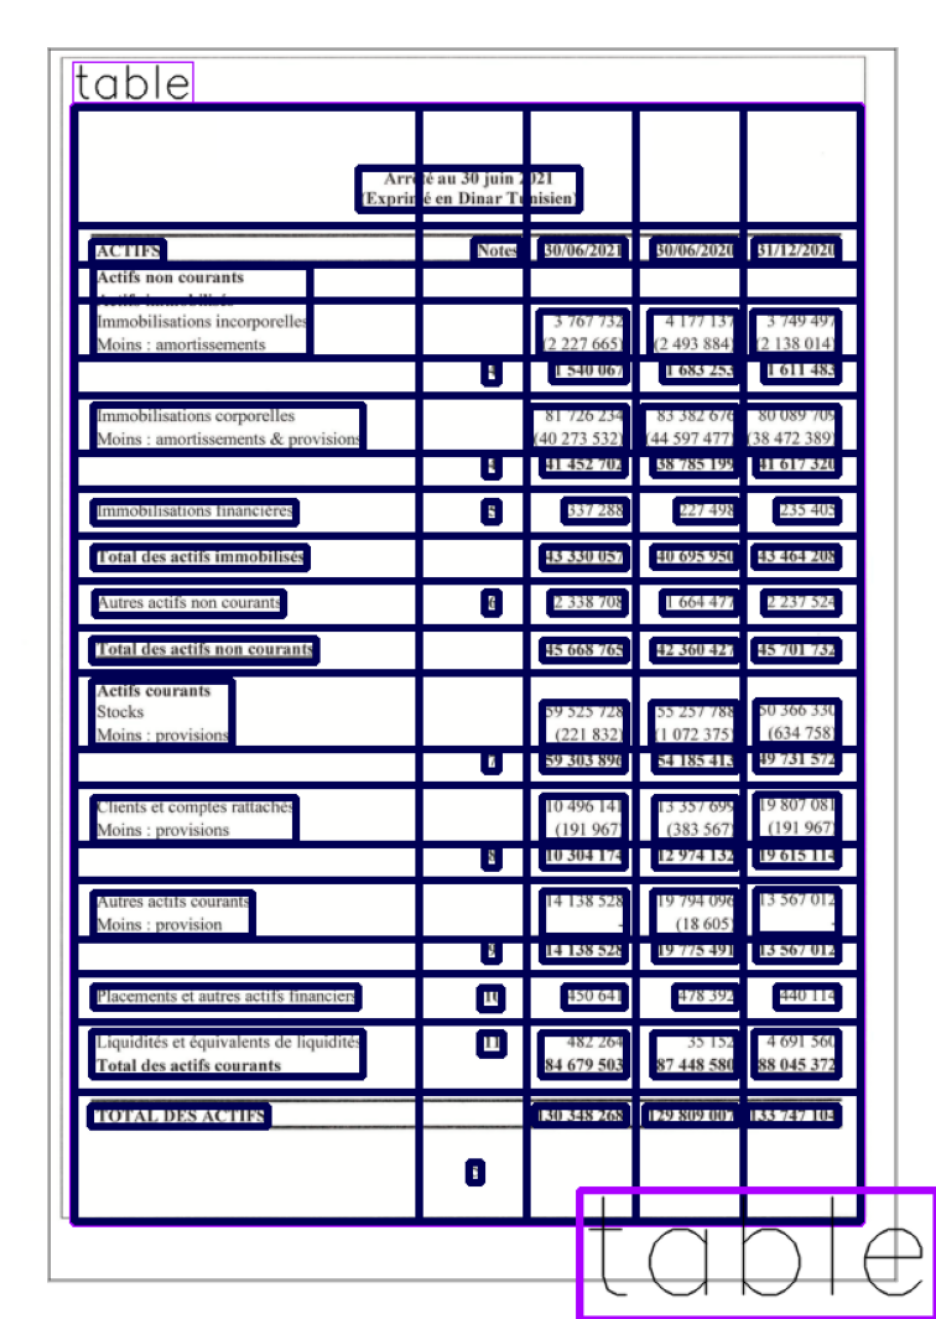

In [8]:
image = page.viz()
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

In [9]:
print(page.text)


In [12]:
page.chunks[0]


IndexError: list index out of range

In [13]:
table = page.tables[0]
table.get_attribute_names()

{'bbox',
 'cells',
 'columns',
 'csv',
 <TableType.html>,
 <TableType.item>,
 <TableType.max_col_span>,
 <TableType.max_row_span>,
 'np_image',
 <TableType.number_of_columns>,
 <TableType.number_of_rows>,
 <Relationships.reading_order>,
 'rows',
 'text',
 'words'}

In [14]:
table.text

'Arrêté au 30 juin 2021 (Exprimé en Dinar Tunisien)      \n ACTIFS  Notes  30/06/2021  30/06/2020  31/12/2020  \n Actifs non courants Actifs immobilisés Immobilisations incorporelles Moins : amortissements      \n   3767732 (2227665)  4177137 (2493.884)  3749497 (2138014)  \n    1540067  1683253  1611483  \n Immobilisations corporelles Moins : amortissements & provisions   81726234 (40273.532)  83.382.676 (44597477)  80089709 (38472:389)  \n    41452702  38 785 199  41617320  \n Immobilisations financières  5  337288  227-498  235405  \n Total des actifs immobilisés   43330057  40695950  43464208  \n Autres actifs non courants  6  2338708  1664477  2237524  \n Total des actifs non courants   45668.765  42:360427  45701732  \n Actifs courants Stocks Moins : provisions   59525728 (221832)  55257788 (1072375)  50366330 (634758)  \n  7  59303896  54185413  49731572  \n Clients et comptes rattachés Moins : provisions   10496 141 (191.967)  13357699 (383.567)  19807081 (191967)  \n  8  10304

In [15]:
print(f" number of rows: {table.number_of_rows} \n number of columns: {table.number_of_columns} \n reading order: {table.reading_order}")


 number of rows: 20 
 number of columns: 5 
 reading order: None


In [20]:
html_content = HTML(page.tables[0].html)


In [23]:
html_content

In [17]:
table.csv


[['Arrêté au 30 juin 2021 (Exprimé en Dinar Tunisien) ', '', '', '', ''],
 ['ACTIFS ', 'Notes ', '30/06/2021 ', '30/06/2020 ', '31/12/2020 '],
 ['Actifs non courants Actifs immobilisés Immobilisations incorporelles Moins : amortissements ',
  '',
  '',
  '',
  ''],
 ['', '', '3767732 (2227665) ', '4177137 (2493.884) ', '3749497 (2138014) '],
 ['', ' ', '1540067 ', '1683253 ', '1611483 '],
 ['Immobilisations corporelles Moins : amortissements & provisions ',
  '',
  '81726234 (40273.532) ',
  '83.382.676 (44597477) ',
  '80089709 (38472:389) '],
 ['', ' ', '41452702 ', '38 785 199 ', '41617320 '],
 ['Immobilisations financières ', '5 ', '337288 ', '227-498 ', '235405 '],
 ['Total des actifs immobilisés ', '', '43330057 ', '40695950 ', '43464208 '],
 ['Autres actifs non courants ', '6 ', '2338708 ', '1664477 ', '2237524 '],
 ['Total des actifs non courants ',
  '',
  '45668.765 ',
  '42:360427 ',
  '45701732 '],
 ['Actifs courants Stocks Moins : provisions ',
  '',
  '59525728 (221832) '

In [35]:
data = []
  

list_header = []
soup = BeautifulSoup(html_content,'html.parser')
header = soup.find_all("table")[0].find("tr")
 
for items in header:
    try:
        list_header.append(items.get_text())
    except:
        continue
 
HTML_data = soup.find_all("table")[0].find_all("tr")[1:]
 
for element in HTML_data:
    sub_data = []
    for sub_element in element:
        try:
            sub_data.append(sub_element.get_text())
        except:
            continue
    data.append(sub_data)
 
dataFrame = pd.DataFrame(data = data)
  
dataFrame.to_csv('table.csv')

In [37]:
data=pd.read_csv("table.csv")
data

,Unnamed: 0,0,1,2,3,4
0,0,ACTIFS,Notes,30/06/2021,30/06/2020,31/12/2020
1,1,Actifs non courants Actifs immobilisés Immobil...,NaN,NaN,NaN,NaN
2,2,NaN,3767732 (2227665),4177137 (2493.884),3749497 (2138014),NaN
3,3,NaN,NaN,1540067,1683253,1611483
4,4,Immobilisations corporelles Moins : amortissem...,NaN,81726234 (40273.532),83.382.676 (44597477),80089709 (38472:389)
5,5,NaN,NaN,41452702,38 785 199,41617320
6,6,Immobilisations financières,5,337288,227-498,235405
7,7,Total des actifs immobilisés,NaN,43330057,40695950,43464208
8,8,Autres actifs non courants,6,2338708,1664477,2237524
9,9,Total des actifs non courants,NaN,45668.765,42:360427,45701732


In [15]:
model = YOLO('keremberke/yolov8m-table-extraction')

# set model parameters
model.overrides['conf'] = 0.25  
model.overrides['iou'] = 0.45  
model.overrides['agnostic_nms'] = False  
model.overrides['max_det'] = 1000 

Boxes:  ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 1., 1., 1.])
conf: tensor([0.8754, 0.8706, 0.7645, 0.3093])
data: tensor([[2.4151e+01, 4.2677e+02, 4.6500e+02, 6.1096e+02, 8.7537e-01, 1.0000e+00],
        [2.6388e+01, 6.5320e+02, 4.6541e+02, 8.1013e+02, 8.7058e-01, 1.0000e+00],
        [2.5118e+01, 2.5027e+02, 4.6549e+02, 3.5793e+02, 7.6446e-01, 1.0000e+00],
        [2.3767e+01, 2.8861e+01, 5.7143e+02, 1.8398e+02, 3.0932e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (842, 596)
shape: torch.Size([4, 6])
xywh: tensor([[244.5746, 518.8647, 440.8480, 184.1956],
        [245.8993, 731.6638, 439.0230, 156.9365],
        [245.3030, 304.1018, 440.3710, 107.6609],
        [297.5970, 106.4213, 547.6599, 155.1198]])
xywhn: tensor([[0.4104, 0.6162, 0.7397, 0.2188],
        [0.4126, 0.8690, 0.7366, 0.1864],
        [0.4116, 0.3612, 0.7389, 0.1279],
        [0.4993, 0.1264, 0.9189, 0.1842]])
xyxy: tensor([[ 24.1506, 426.7669, 464.9987, 610.9625],
        [

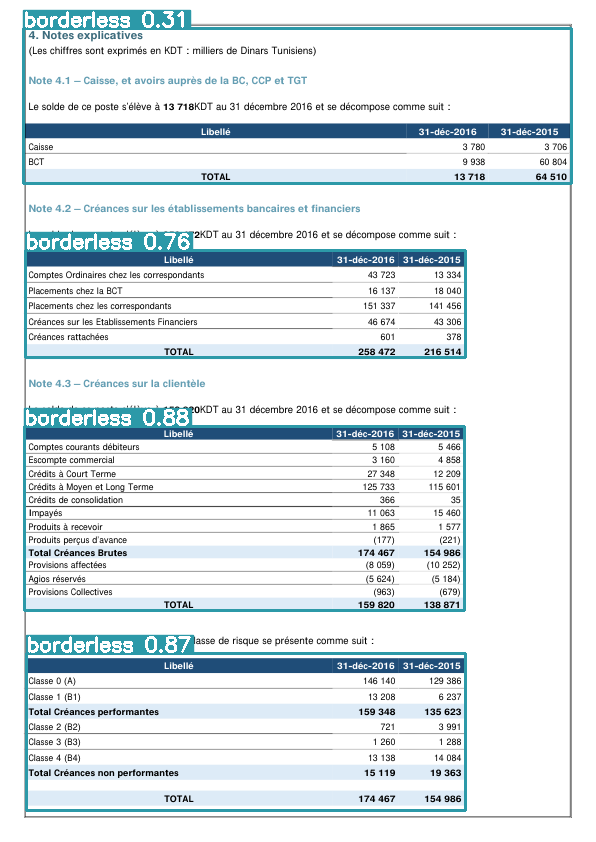

In [16]:
results = model.predict(img)

print('Boxes: ', results[0].boxes)
render = render_result(model=model, image=img, result=results[0])
render

In [17]:
for box in results[0].boxes.data.numpy():
    print("Box shape:", box.shape)

Box shape: (6,)
Box shape: (6,)
Box shape: (6,)
Box shape: (6,)


In [18]:
# # Assuming results is a list of detected objects, each containing bounding box information

# # Iterate over all detected objects
# for box in results[0].boxes.data.numpy():
#     # Extract bounding box coordinates
#     x1, y1, x2, y2 = map(int, box[:4])

#     # Crop the table region from the original image
#     cropped_image = img[y1:y2, x1:x2]

#     # Convert the cropped region to an Image object
#     cropped_image = Image.fromarray(cropped_image)

#     # Process the cropped table region (e.g., perform OCR, further analysis, etc.)
#     # ...

#     # Save or display the cropped table region
#     cropped_image 


In [19]:
x1, y1, x2, y2, _, _ = tuple(int(item) for item in results[0].boxes.data.numpy()[3])
img = np.array(Image.open(image))
#cropping
cropped_image = img[y1:y2, x1:x2]
cropped_image = Image.fromarray(cropped_image)
cropped_image

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [ ]:
# ext_df = pytesseract.image_to_data(cropped_image, output_type=Output.DATAFRAME, config="--psm 6 --oem 3")
# ext_df.head()

In [ ]:
results[0].boxes[2]

NameError: name 'results' is not defined

In [ ]:
original_image = cv2.imread('abc_efd311216_page_7.png')

box = results[0].boxes[2].xyxy  
print(box)

x1, y1, x2, y2 = map(int, box[0])

cropped_image = original_image[y1:y2, x1:x2]

cv2.imwrite('cropped_table.jpeg', cropped_image)

NameError: name 'cv2' is not defined

In [ ]:
import os
import json

os.environ['USE_TF'] = '1'
#os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt



doc = DocumentFile.from_images("cropped_table.jpeg")
print(f"Number of pages: {len(doc)}")

Number of pages: 1


In [ ]:
# predictor = PaddleOCR(use_gpu=False,lang='french')
# result = predictor.ocr('cropped_table.jpeg', cls=True)


In [ ]:
# result

In [ ]:
predictor = ocr_predictor(pretrained=True)

result = predictor(doc)

03/31/2024 16:11:38 - INFO - root -   Using downloaded & verified file: C:\Users\kortb\.cache\doctr\models\db_resnet50-79bd7d70.pt
03/31/2024 16:11:40 - INFO - root -   Using downloaded & verified file: C:\Users\kortb\.cache\doctr\models\crnn_vgg16_bn-9762b0b0.pt


In [ ]:
result

Document(
  (pages): [Page(
    dimensions=(107, 440)
    (blocks): [
      Block(
        (lines): [Line(
          (words): [Word(value='Libellé', confidence=0.79)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='31-déc-2016', confidence=0.55),
            Word(value='31-déc-2015', confidence=0.6),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='Comptes', confidence=0.99),
            Word(value='Ordinaires', confidence=0.99),
            Word(value='chez', confidence=1.0),
            Word(value='les', confidence=0.98),
            Word(value='correspondants', confidence=0.87),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='43', confidence=1.0),
            Word(value='723', confidence=1.0),
          ]
        )]
        (artef

In [ ]:
json_export = result.export()
json_export

In [ ]:


# Instantiate a pretrained model
#
# JSON export
json_export = result.export()

def remove_fields(obj, fields):
    if isinstance(obj, list):
        for item in obj:
            remove_fields(item, fields)
    elif isinstance(obj, dict):
        for key in list(obj.keys()):
            if key in fields:
                del obj[key]
            else:
                remove_fields(obj[key], fields)

# def remove_geometry(data):
#     if isinstance(data, list):
#         for item in data:
#             remove_geometry(item)
#     elif isinstance(data, dict):
#         if 'geometry' in data:
#             del data['geometry']
#         for key, value in data.items():
#             remove_geometry(value)

fields_to_remove = ['confidence', 'page_idx', 'dimensions', 'orientation', 'language', 'artefacts']

remove_fields(json_export, fields_to_remove)

for page in json_export['pages']:
    for block in page['blocks']:
        if 'geometry' in block:
            del block['geometry']
        for line in block.get('lines', []):
            if 'geometry' in line:
                del line['geometry']

modified_json = json.dumps(json_export, separators=(',', ':'),ensure_ascii=False)

print(modified_json)

output_file_path = "OCR_Result2.json"

with open(output_file_path, "w",encoding="utf-8") as output_file:
    output_file.write(modified_json)

print(f"Modified JSON data saved to {output_file_path}")

{"pages":[{"blocks":[{"lines":[{"words":[{"value":"Libellé","geometry":[[0.3154296875,0.046217873831775724],[0.3837890625,0.13456483644859812]]}]}]},{"lines":[{"words":[{"value":"31-déc-2016","geometry":[[0.708984375,0.050233644859813076],[0.8408203125,0.13456483644859812]]},{"value":"31-déc-2015","geometry":[[0.8583984375,0.050233644859813076],[0.9912109375,0.13456483644859812]]}]}]},{"lines":[{"words":[{"value":"Comptes","geometry":[[0.0068359375,0.1948014018691589],[0.0869140625,0.2831483644859813]]},{"value":"Ordinaires","geometry":[[0.091796875,0.1948014018691589],[0.1845703125,0.2670852803738318]]},{"value":"chez","geometry":[[0.1884765625,0.1907856308411215],[0.232421875,0.27110105140186913]]},{"value":"les","geometry":[[0.2353515625,0.1907856308411215],[0.263671875,0.27511682242990654]]},{"value":"correspondants","geometry":[[0.2685546875,0.1948014018691589],[0.4072265625,0.2831483644859813]]}]}]},{"lines":[{"words":[{"value":"43","geometry":[[0.7783203125,0.1948014018691589],[

In [ ]:
import re

def is_valid_format(date_str):
    # Define the regular expression pattern for the format "DD-MMM-YYYY"
    pattern = r'^\d{2}-\w{3}-\d{4}$'
    
    # Check if the date string matches the pattern
    if re.match(pattern, date_str):
        return True
    else:
        return False

In [ ]:
import json

new_file_path = "new_Ocr2.json"
concatenated_values = []

for page in json_export['pages']:
    for block in page['blocks']:
        lines = block["lines"]
        num_lines = len(lines)
        if num_lines > 1:
            for i in range(num_lines - 1):     
                concatenated_value = ""
                current_line = lines[i]
                next_line = lines[i + 1]
                for word in current_line["words"]:
                    concatenated_value += " " + word["value"]
                for word in next_line["words"]:
                    concatenated_value += " " + word["value"]
                concatenated_values.append(concatenated_value.strip()) 
        else:
            for i in range(num_lines):  
                concatenated_value = ""
                current_line = lines[i]
                for word in current_line["words"]:
                    if is_valid_format(word["value"]):
                      concatenated_values.append(word["value"])
                    else:
                      concatenated_value += " " + word["value"]
                    
                concatenated_values.append(concatenated_value.strip())

# Print each concatenation with its index and value
# for idx, value in enumerate(concatenated_values, start=1):
#     print(f"Concatenation {idx}: {value}")

# Prepare the JSON data
new_json_data = {
    "concatenated_values": concatenated_values
}

# Convert JSON data to a string
new_json_string = json.dumps(new_json_data, indent=4, ensure_ascii=False)

# Write the JSON string to a file
with open(new_file_path, "w", encoding="utf-8") as output_file:
    output_file.write(new_json_string)

print("New JSON file created successfully:", new_file_path)


New JSON file created successfully: new_Ocr2.json


03/31/2024 16:11:43 - WARNING - root -   unable to load recommended font family. Loading default PIL font,font size issues may be expected.To prevent this, it is recommended to specify the value of 'font_family'.
03/31/2024 16:11:43 - WARNING - root -   unable to load recommended font family. Loading default PIL font,font size issues may be expected.To prevent this, it is recommended to specify the value of 'font_family'.
03/31/2024 16:11:43 - WARNING - root -   unable to load recommended font family. Loading default PIL font,font size issues may be expected.To prevent this, it is recommended to specify the value of 'font_family'.
03/31/2024 16:11:43 - WARNING - root -   unable to load recommended font family. Loading default PIL font,font size issues may be expected.To prevent this, it is recommended to specify the value of 'font_family'.
03/31/2024 16:11:43 - WARNING - root -   unable to load recommended font family. Loading default PIL font,font size issues may be expected.To preven

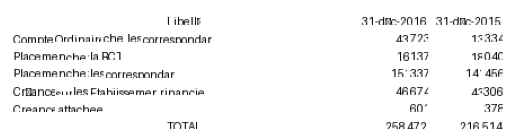

In [ ]:
import matplotlib.pyplot as plt

synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()


In [ ]:
with open("OCR_Result.txt", "r") as f:
    data = json.load(f)

In [ ]:
def extract_values(page_data):
    values = []
    for block in page_data["blocks"]:
        for line in block["lines"]:
            for word in line["words"]:
                values.append(word["value"])
    return values

all_values = []
for page in data["pages"]:
    page_values = extract_values(page)
    all_values.extend(page_values)

In [ ]:
from transformers import AutoModelForObjectDetection
model = AutoModelForObjectDetection.from_pretrained("microsoft/table-transformer-detection", revision="no_timm")
print(model.config.id2label)

{0: 'table', 1: 'table rotated'}


In [ ]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
print("")

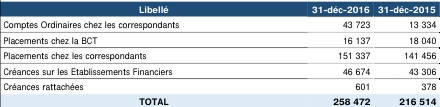

In [ ]:
from PIL import Image
from huggingface_hub import hf_hub_download

# let's load an example image
file_path = 'cropped_table.jpeg'
image = Image.open(file_path).convert("RGB")
image

In [ ]:
from torchvision import transforms

class MaxResize(object):
    def __init__(self, max_size=800):
        self.max_size = max_size

    def __call__(self, image):
        width, height = image.size
        current_max_size = max(width, height)
        scale = self.max_size / current_max_size
        resized_image = image.resize((int(round(scale*width)), int(round(scale*height))))

        return resized_image

detection_transform = transforms.Compose([
    MaxResize(800),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

pixel_values = detection_transform(image).unsqueeze(0)
pixel_values = pixel_values.to(device)
print(pixel_values.shape)

torch.Size([1, 3, 195, 800])


In [ ]:
import torch

with torch.no_grad():
  outputs = model(pixel_values)

print(outputs.logits.shape)

torch.Size([1, 15, 3])


In [ ]:
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(-1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h), (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)


def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b


# update id2label to include "no object"
id2label = model.config.id2label
id2label[len(model.config.id2label)] = "no object"


def outputs_to_objects(outputs, img_size, id2label):
    m = outputs.logits.softmax(-1).max(-1)
    pred_labels = list(m.indices.detach().cpu().numpy())[0]
    pred_scores = list(m.values.detach().cpu().numpy())[0]
    pred_bboxes = outputs['pred_boxes'].detach().cpu()[0]
    pred_bboxes = [elem.tolist() for elem in rescale_bboxes(pred_bboxes, img_size)]

    objects = []
    for label, score, bbox in zip(pred_labels, pred_scores, pred_bboxes):
        class_label = id2label[int(label)]
        if not class_label == 'no object':
            objects.append({'label': class_label, 'score': float(score),
                            'bbox': [float(elem) for elem in bbox]})

    return objects

objects = outputs_to_objects(outputs, image.size, id2label)
print(objects)

[{'label': 'table', 'score': 0.9990342855453491, 'bbox': [3.8403189182281494, 3.528639316558838, 436.6033020019531, 106.73509216308594]}]


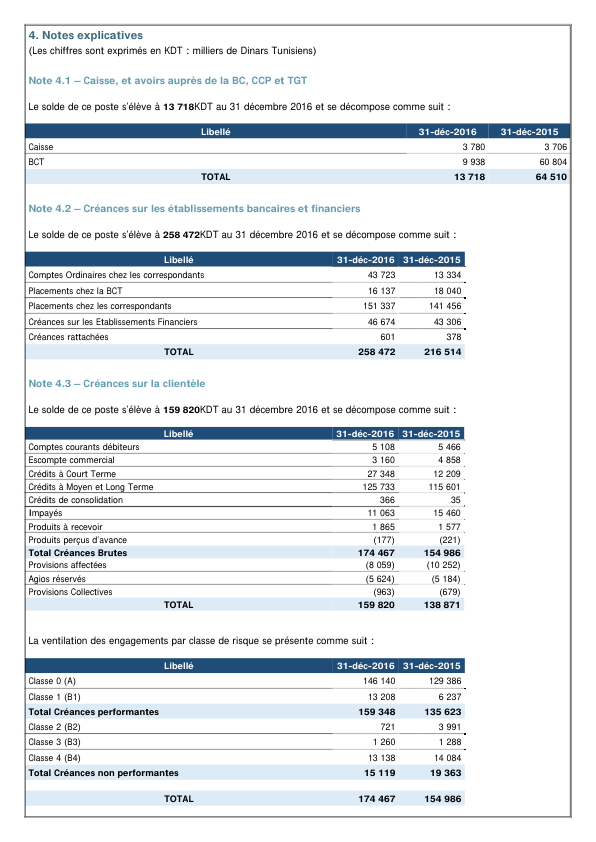

In [ ]:
img

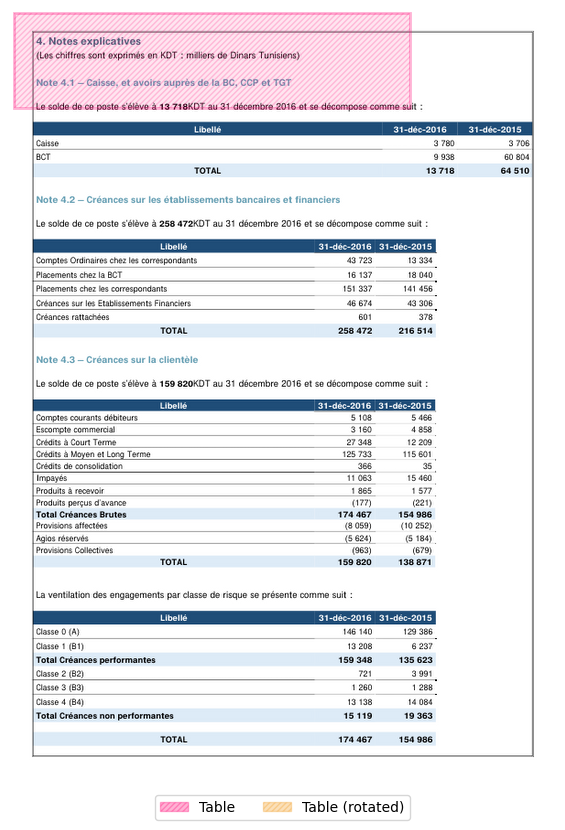

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Patch

def fig2img(fig):
    import io
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img


def visualize_detected_tables(img, det_tables, out_path=None):
    plt.imshow(img, interpolation="lanczos")
    fig = plt.gcf()
    fig.set_size_inches(20, 20)
    ax = plt.gca()

    for det_table in det_tables:
        bbox = det_table['bbox']

        if det_table['label'] == 'table':
            facecolor = (1, 0, 0.45)
            edgecolor = (1, 0, 0.45)
            alpha = 0.3
            linewidth = 2
            hatch='//////'
        elif det_table['label'] == 'table rotated':
            facecolor = (0.95, 0.6, 0.1)
            edgecolor = (0.95, 0.6, 0.1)
            alpha = 0.3
            linewidth = 2
            hatch='//////'
        else:
            continue

        rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=linewidth,
                                    edgecolor='none',facecolor=facecolor, alpha=0.1)
        ax.add_patch(rect)
        rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=linewidth,
                                    edgecolor=edgecolor,facecolor='none',linestyle='-', alpha=alpha)
        ax.add_patch(rect)
        rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=0,
                                    edgecolor=edgecolor,facecolor='none',linestyle='-', hatch=hatch, alpha=0.2)
        ax.add_patch(rect)

    plt.xticks([], [])
    plt.yticks([], [])

    legend_elements = [Patch(facecolor=(1, 0, 0.45), edgecolor=(1, 0, 0.45),
                                label='Table', hatch='//////', alpha=0.3),
                        Patch(facecolor=(0.95, 0.6, 0.1), edgecolor=(0.95, 0.6, 0.1),
                                label='Table (rotated)', hatch='//////', alpha=0.3)]
    plt.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.02), loc='upper center', borderaxespad=0,
                    fontsize=10, ncol=2)
    plt.gcf().set_size_inches(10, 10)
    plt.axis('off')

    if out_path is not None:
      plt.savefig(out_path, bbox_inches='tight', dpi=150)

    return fig

fig = visualize_detected_tables(img, objects)
visualized_image = fig2img(fig)

[{'label': 'table', 'score': 0.9990342855453491, 'bbox': [3.8403189182281494, 3.528639316558838, 436.6033020019531, 106.73509216308594]}]


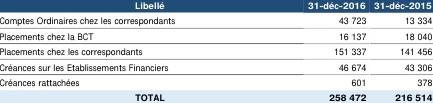

In [ ]:
def objects_to_crops(img, tokens, objects, class_thresholds, padding=10):
    """
    Process the bounding boxes produced by the table detection model into
    cropped table images and cropped tokens.
    """

    table_crops = []
    for obj in objects:
        if obj['score'] < class_thresholds[obj['label']]:
            continue

        cropped_table = {}

        bbox = obj['bbox']
        bbox = [bbox[0]-padding, bbox[1]-padding, bbox[2]+padding, bbox[3]+padding]

        cropped_img = img.crop(bbox)

        table_tokens = [token for token in tokens if  (token['bbox'], bbox) >= 0.5]
        for token in table_tokens:
            token['bbox'] = [token['bbox'][0]-bbox[0],
                             token['bbox'][1]-bbox[1],
                             token['bbox'][2]-bbox[0],
                             token['bbox'][3]-bbox[1]]

        # If table is predicted to be rotated, rotate cropped image and tokens/words:
        if obj['label'] == 'table rotated':
            cropped_img = cropped_img.rotate(270, expand=True)
            for token in table_tokens:
                bbox = token['bbox']
                bbox = [cropped_img.size[0]-bbox[3]-1,
                        bbox[0],
                        cropped_img.size[0]-bbox[1]-1,
                        bbox[2]]
                token['bbox'] = bbox

        cropped_table['image'] = cropped_img
        cropped_table['tokens'] = table_tokens

        table_crops.append(cropped_table)

    return table_crops

print(objects)

# to view corp tables
tokens = []
detection_class_thresholds = {
    "table": 0.5,
    "table rotated": 0.5,
    "no object": 10
}
crop_padding = 10

tables_crops = objects_to_crops(image, tokens, objects, detection_class_thresholds, padding=0)
cropped_table = tables_crops[0]['image'].convert("RGB")
cropped_table

In [ ]:
from transformers import TableTransformerForObjectDetection

structure_model = AutoModelForObjectDetection.from_pretrained("bilguun/table-transformer-structure-recognition")
structure_model.to(device)
print("")

structure_model.config.id2label

structure_transform = transforms.Compose([
    MaxResize(1000),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

pixel_values = structure_transform(cropped_table).unsqueeze(0)
pixel_values = pixel_values.to(device)
print(pixel_values.shape)

with torch.no_grad():
  outputs = structure_model(pixel_values)

structure_id2label = structure_model.config.id2label
structure_id2label[len(structure_id2label)] = "no object"

cells = outputs_to_objects(outputs, cropped_table.size, structure_id2label)
print(cells)


torch.Size([1, 3, 238, 1000])
[{'label': 'table column', 'score': 0.9481618404388428, 'bbox': [268.2641296386719, 0.24510762095451355, 371.7471923828125, 102.28451538085938]}, {'label': 'table row', 'score': 0.9833666086196899, 'bbox': [-0.0041294097900390625, 11.782641410827637, 432.91845703125, 28.191999435424805]}, {'label': 'table column', 'score': 0.9935672879219055, 'bbox': [373.1297912597656, 0.11274170875549316, 432.81622314453125, 102.36408996582031]}, {'label': 'table column header', 'score': 0.87941575050354, 'bbox': [0.27474769949913025, -0.25765055418014526, 433.1759033203125, 12.741154670715332]}, {'label': 'table row', 'score': 0.9877529144287109, 'bbox': [-0.055076003074645996, 27.86831283569336, 432.86810302734375, 43.318206787109375]}, {'label': 'table row', 'score': 0.9960986375808716, 'bbox': [-0.12509530782699585, 72.9285659790039, 432.7699279785156, 88.65613555908203]}, {'label': 'table row', 'score': 0.9962179064750671, 'bbox': [-0.03333207964897156, 42.63438415

In [ ]:
def get_cell_coordinates_by_row(table_data):
    rows = [entry for entry in table_data if entry['label'] == 'table row']
    columns = [entry for entry in table_data if entry['label'] == 'table column']

    rows.sort(key=lambda x: x['bbox'][1])
    columns.sort(key=lambda x: x['bbox'][0])

    def find_cell_coordinates(row, column):
        cell_bbox = [column['bbox'][0], row['bbox'][1], column['bbox'][2], row['bbox'][3]]
        return cell_bbox

    cell_coordinates = []

    for row in rows:
        row_cells = []
        for column in columns:
            cell_bbox = find_cell_coordinates(row, column)
            row_cells.append({'column': column['bbox'], 'cell': cell_bbox})

        row_cells.sort(key=lambda x: x['column'][0])

        cell_coordinates.append({'row': row['bbox'], 'cells': row_cells, 'cell_count': len(row_cells)})

    cell_coordinates.sort(key=lambda x: x['row'][1])

    return cell_coordinates

cell_coordinates = get_cell_coordinates_by_row(cells)

In [ ]:
cell_coordinates

[{'row': [0.17858406901359558,
   -0.1971924751996994,
   433.0693359375,
   12.537769317626953],
  'cells': [{'column': [-1.4826903343200684,
     0.12004131078720093,
     268.4604187011719,
     102.34358978271484],
    'cell': [-1.4826903343200684,
     -0.1971924751996994,
     268.4604187011719,
     12.537769317626953]},
   {'column': [268.2641296386719,
     0.24510762095451355,
     371.7471923828125,
     102.28451538085938],
    'cell': [268.2641296386719,
     -0.1971924751996994,
     371.7471923828125,
     12.537769317626953]},
   {'column': [373.1297912597656,
     0.11274170875549316,
     432.81622314453125,
     102.36408996582031],
    'cell': [373.1297912597656,
     -0.1971924751996994,
     432.81622314453125,
     12.537769317626953]}],
  'cell_count': 3},
 {'row': [-0.0041294097900390625,
   11.782641410827637,
   432.91845703125,
   28.191999435424805],
  'cells': [{'column': [-1.4826903343200684,
     0.12004131078720093,
     268.4604187011719,
     102.3435

In [ ]:
# num_rows = len(cell_coordinates)

num_columns = len(cell_coordinates[0]['cells'])

# print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of columns: 3


In [ ]:
from huggingface_hub import hf_hub_download
from transformers import AutoImageProcessor, TableTransformerForObjectDetection
import torch
from PIL import Image

file_path = 'cropped_table.jpeg'
image = Image.open(file_path).convert("RGB")


image_processor = AutoImageProcessor.from_pretrained("bilguun/table-transformer-structure-recognition")
model = AutoModelForObjectDetection.from_pretrained("bilguun/table-transformer-structure-recognition")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)
num_rows=0
# convert outputs (bounding boxes and class logits) to Pascal VOC format (xmin, ymin, xmax, ymax)
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[
    0
]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    if(model.config.id2label[label.item()])=="table row":
        num_rows+=1
print(num_rows)

c:\Users\kortb\Desktop\BFI\env\Lib\site-packages\transformers\models\detr\feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(


7


In [ ]:
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 7
Number of columns: 3


In [ ]:
df = pd.DataFrame(np.nan, index=np.arange(num_rows), columns=np.arange(num_columns))

In [ ]:
import json
import pandas as pd

with open('new_Ocr2.json', 'r', encoding="utf-8") as file:
    json_data = json.load(file)


values = json_data['concatenated_values']

data = [values[i:i+num_columns] for i in range(0, len(values), num_columns)]

df = pd.DataFrame(data)
print(df)



                                            0            1            2
0                                     Libellé  31-déc-2016  31-déc-2015
1  Comptes Ordinaires chez les correspondants       43 723       13 334
2                      Placements chez la BCT       16 137       18 040
3          Placements chez les correspondants      151 337      141 456
4  Créances sur les Etabiissements rinanciers       46 674       43 306
5                          Creances attachees          601          378
6                                       TOTAL      258 472      216 514
